In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
import matplotlib.ticker as ticker



In [2]:
# Define file names
pickle_files = [
    'checkpoint_cluster_result.pickle',
    'checkpoint_part1.pickle',
    'checkpoint_part2.pickle'
]

# Initialize empty lists to store data
avg_ramp_up = []
avg_ramp_down = []
t_el = None
ql_sta = None
ql_dyn = None

# Read and combine data from all pickle files
for file in pickle_files:
    with open(file, 'rb') as f:
        avg_ramp_up.extend(pickle.load(f))  # Assuming this is a list
        avg_ramp_down.extend(pickle.load(f))  # Assuming this is a list
        if t_el is None:
            t_el = pickle.load(f)
        if ql_sta is None:
            ql_sta = pickle.load(f)
        if ql_dyn is None:
            ql_dyn = pickle.load(f)

# Plot configuration
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 300


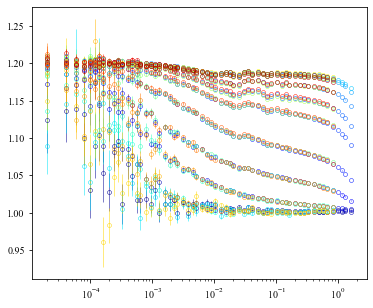

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))

g2_idx = 0
total_size = sum(len(avg_dict['temperature_x']) for avg_dict in avg_ramp_up)

accu_size = 0
for avg_dict in avg_ramp_up:
    curr_size = len(avg_dict['temperature_x'])
    idx = accu_size + np.arange(curr_size) * 1.0
    idx /= total_size
    accu_size += curr_size

    cmap = plt.get_cmap('jet')
    color = cmap(np.mean(idx))

    # Ensure x (t_el) and y (g2 values) have the same length
    g2_values = avg_dict['g2'][:, g2_idx]
    g2_err_values = avg_dict['g2_err'][:, g2_idx]

    min_length = min(len(t_el), len(g2_values))

    ax.errorbar(t_el[:min_length], g2_values[:min_length], 
                yerr=g2_err_values[:min_length], fmt='o', color=color, 
                lw=0.5, ms=4, mew=0.5, mfc='none')

    ax.set_xscale('log')


plt.savefig('H02_RampUp_XPCS_combined.pdf')